In [4]:
import pandas
import spacy
import nltk
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.corpus import stopwords
import string
import re

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
job_desc="Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist career. Let’s look at the must-have data scientist qualifications. Key skills needed to become a data scientist: Programming Skills – knowledge of statistical programming languages like R, Python, and database query languages like SQL, Hive, Pig is desirable. Familiarity with Scala, Java, or C++ is an added advantage. Statistics – Good applied statistical skills, including knowledge of statistical tests, distributions, regression, maximum likelihood estimators, etc. Proficiency in statistics is essential for data-driven companies. Machine Learning – good knowledge of machine learning methods like k-Nearest Neighbors, Naive Bayes, SVM, Decision Forests. Strong Math Skills (Multivariable Calculus and Linear Algebra) - understanding the fundamentals of Multivariable Calculus and Linear Algebra is important as they form the basis of a lot of predictive performance or algorithm optimization techniques. Data Wrangling – proficiency in handling imperfections in data is an important aspect of a data scientist job description. Experience with Data Visualization Tools like matplotlib, ggplot, d3.js., Tableau that help to visually encode data Excellent Communication Skills – it is incredibly important to describe findings to a technical and non-technical audience. Strong Software Engineering Background Hands-on experience with data science tools Problem-solving aptitude Analytical mind and great business sense Degree in Computer Science, Engineering or relevant field is preferred Proven Experience as Data Analyst or Data Scientist"
job_desc

'Data mining or extracting usable data from valuable data sources Using machine learning tools to select features, create and optimize classifiers Carrying out preprocessing of structured and unstructured data Enhancing data collection procedures to include all relevant information for developing analytic systems Processing, cleansing, and validating the integrity of data to be used for analysis Analyzing large amounts of information to find patterns and solutions Developing prediction systems and machine learning algorithms Presenting results in a clear manner Propose solutions and strategies to tackle business challenges Collaborate with Business and IT teams Become a Data Science Expert & Get Your Dream Job Professional Certificate Program In Data ScienceEXPLORE PROGRAMBecome a Data Science Expert & Get Your Dream Job Data Scientist Skills You need to master the skills required for data scientist jobs in various industries and organizations if you want to pursue a data scientist car

### **Job description pre-processing**

In [7]:
job_desc = "".join([c for c in job_desc if c not in string.punctuation])
job_desc_token = re.split('\W+',job_desc)
print("Job Descrption token lentgh : ", len(job_desc_token))
job_desc = job_desc_token
job_desc_sp = [word for word in job_desc_token if word not in nltk.corpus.stopwords.words('english')]
job_desc = job_desc_sp
print("Job Descrption twithout stop words lentgh : ", len(job_desc_sp))

Job Descrption token lentgh :  351
Job Descrption twithout stop words lentgh :  263


In [8]:
ln=nltk.WordNetLemmatizer()
lemm=[ln.lemmatize(word) for word in job_desc]
job_desc = lemm

In [9]:
#difference = [x for x in job_desc if x not in lemm]
#print(difference)
#pour comparer les differences entre els deux listes job_desc et lemm

In [10]:
print(job_desc)

['Data', 'mining', 'extracting', 'usable', 'data', 'valuable', 'data', 'source', 'Using', 'machine', 'learning', 'tool', 'select', 'feature', 'create', 'optimize', 'classifier', 'Carrying', 'preprocessing', 'structured', 'unstructured', 'data', 'Enhancing', 'data', 'collection', 'procedure', 'include', 'relevant', 'information', 'developing', 'analytic', 'system', 'Processing', 'cleansing', 'validating', 'integrity', 'data', 'used', 'analysis', 'Analyzing', 'large', 'amount', 'information', 'find', 'pattern', 'solution', 'Developing', 'prediction', 'system', 'machine', 'learning', 'algorithm', 'Presenting', 'result', 'clear', 'manner', 'Propose', 'solution', 'strategy', 'tackle', 'business', 'challenge', 'Collaborate', 'Business', 'IT', 'team', 'Become', 'Data', 'Science', 'Expert', 'Get', 'Your', 'Dream', 'Job', 'Professional', 'Certificate', 'Program', 'In', 'Data', 'ScienceEXPLORE', 'PROGRAMBecome', 'Data', 'Science', 'Expert', 'Get', 'Your', 'Dream', 'Job', 'Data', 'Scientist', 'Sk

### **Create a set of skills and key terms from the job description**

In [12]:
nlp = spacy.load("en_core_web_sm") #traitement du texte en anglais (en_core_web_sm) dans un objet nlp en chargeant le modèle spaCy
desc = nlp(' '.join([c for c in job_desc]))
def unique_list(text):
    return set(' '.join([c for c in text]).lower().split(' '))
skills_list = set(' '.join([chunk.text for chunk in desc.noun_chunks]+[token.lemma_ for token in desc if token.pos_ == "VERB"]+[entity.text for entity in desc.ents]).lower().split(' '))

### **List of skills in job description**

In [13]:
print(skills_list)

{'system', 'mining', 'your', 'look', 'enhance', 'maximum', 'technical', 'include', 'let', 'pig', 'find', 'musthave', 'valuable', 'decision', 'experience', 'nontechnical', 'organization', 'good', 'understand', 'qualification', 'create', 'validate', 'wrangling', 'linear', 'enhancing', 'familiarity', 'c', 'tools', 'neighbors', 'it', 'data', 'information', 'datadriven', 'handling', 'visually', 'processing', 'prediction', 'solution', 'analytical', 'use', 'need', 'imperfection', 'validating', 'aspect', 'learning', 'sql', 'career', 'usable', 'skills', 'background', 'analysis', 'handson', 'important', 'science', 'preferred', 'require', 'etc', 'description', 'procedure', 'optimize', 'tool', 'advantage', 'structure', 'pursue', 'knowledge', 'help', 'strong', 'excellent', 'multivariable', 'certificate', 'program', 'programbecome', 'forests', 'job', 'analyst', 'desirable', 'calculus', 'become', 'you', 'scala', 'visualization', 'professional', 'company', 'analyze', 'algebra', 'python', 'encode', 'va

## **Load dataset**

In [14]:
df=pandas.read_csv('UpdatedResumeDataSet.csv')

In [15]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [17]:
category_counts = df['Category'].value_counts()
category_counts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

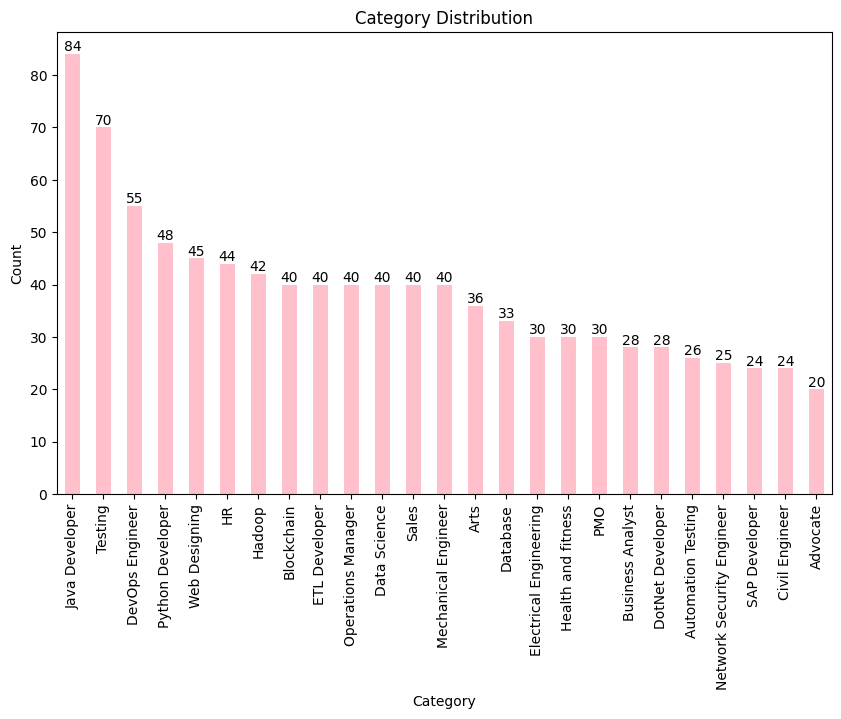

In [18]:
plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar', color='pink')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
for i, count in enumerate(category_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*   Most of the candidates are Java Developers, followed by testing and Devops engineers.
*   Data Science is in 11/25 place with only 40 records.

Now let's merge category and resume columns to pre-process them

In [19]:
df['Cat_Resume'] = df['Category']+' '+df['Resume']

In [20]:
df.head(1)

,Category,Resume,Cat_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...


In [21]:
def remove_punctuation(text):
  no_punctuation = ''.join([c for c in text if c not in string.punctuation])
  return no_punctuation
df['no_punctuation']=df['Cat_Resume'].apply(lambda x:remove_punctuation (x))
#df.to_csv('after_remove_punc.csv',index=False)

In [22]:
def tokenize(text):
  tokens =re.split('\W+',text)
  return tokens
df['after_tokenization'] = df['Cat_Resume'].apply(lambda x:tokenize(x))
#df.to_csv('after_tokenization.csv',index=False)

Pos Tagging: part-of-speech tags that provide information about the grammatical roles of words in the text.

In [24]:
def pos_tag(text):
  pos_text=nltk.pos_tag(text)
  return pos_text
df['after_pos_tagging']=df['after_tokenization'].apply(lambda x:pos_tag(x))
#df.to_csv('after_pos_tagging.csv',index=False)

Remove stop words

In [26]:
stop_words=set(stopwords.words('english'))
def remove_stopword(text):
  text_sw=[word for word in text if word not in stop_words]
  return text_sw
df['remove_sw']=df['after_tokenization'].apply(lambda x:remove_stopword(x))
#df.to_csv('after_re_sw.csv',index=False)

Lemmatization

In [27]:
ln=nltk.WordNetLemmatizer()
def lemm(text):
  z=[ln.lemmatize(word) for word in text]
  return z
df['after_lemmatization']=df['remove_sw'].apply(lambda x:lemm(x))
#df.to_csv('after_lemmatization.csv',index=False)

 Noun phrases: Identify and extract sequences of words that function as nouns within a text.

In [29]:
def noun_phrases(text):
  x=' '.join([n for n in text])
  doc=nlp(x)
  return [chunk.text for chunk in doc.noun_chunks]
df['noun_phrases']=df['after_lemmatization'].apply(lambda x:noun_phrases(x))
df['noun_phrases'].head()

0    [Data Science Skills Programming Languages Pyt...
1    [Data Science Education Details May 2013 May 2...
2    [Data Science Areas Interest Deep Learning Con...
3    [Data Science Skills â R â Python, SAP, HANA, ...
4    [Data Science Education Details MCA YMCAUST Fa...
Name: noun_phrases, dtype: object

In [30]:
def noun_forms(text):
    x = ' '.join([y for y in text])
    doc = nlp(x)
    return [token.lemma_ for token in doc if token.pos_ == "NOUN"]

df['noun_forms'] = df['after_lemmatization'].apply(lambda x: noun_forms(x))
df['noun_forms'].head()

0    [panda, scikit, technique, processing, dimensi...
1    [b, e, year, month, month, aw, year, month, ye...
2    [week, guidance, hangar, fighter, aircraft, py...
3    [month, month, month, month, year, month, year...
4    [internship, year, month, year, month, year, m...
Name: noun_forms, dtype: object

 Verb phrases: Identify and extract sequences of words that function as nouns within a text.

In [31]:
def verb_forms(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [token.lemma_ for token in doc if token.pos_ == "VERB"]
df['verb_forms']=df['after_lemmatization'].apply(lambda x:verb_forms(x))
df['verb_forms']

0      [learn, learn, boost, embed, model, understand...
1      [learn, sagar, deploy, learn, miss, encode, sc...
2      [ltspice, ENTHUSIAST, excel, mathematic, work,...
3      [learn, involve, analyse, come, give, carry, p...
4                                                     []
                             ...                        
957    [test, work, motivate, check, follow, conduct,...
958    [accept, declare, mention, bear, mention, perf...
959    [learn, conduct, prepare, inverter, set, cause...
960                             [wind, use, use, design]
961    [test, report, handle, test, execute, coordina...
Name: verb_forms, Length: 962, dtype: object

Extract Named entities : specific, identifiable entities within text, such as names of people, companies, locations, and more.

In [32]:
def named_entities(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [entity.text for entity in doc.ents]
df['named_entities']=df['after_lemmatization'].apply(lambda x:named_entities(x))
df['named_entities'].head()

0    [Sql Java JavaScript JQuery Machine, Cassandra...
1    [Data Science Education, May 2013, May 2017, M...
2    [Data Science Areas Interest Deep Learning Con...
3    [Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...
4    [Data Science Education Details, Haryana Data ...
Name: named_entities, dtype: object

Merge noun phrases,verb forms,named entities as a single column to find the matched words & phrases

In [33]:
def string(text):
  return set(' '.join([char for char in text]).lower().split(' '))
df['total_words']=(df['noun_phrases']+df['verb_forms']+df['named_entities']).apply(lambda x:string(x))
df['total_words'].head()

0      {system, social, products, open, others, serie...
1      {linkedin, series, rathore, achievements, pape...
2      {system, q, fighter, segment, technical, jupyt...
3      {deloitte, system, view, products, usi, requir...
4      {education, haryana, itechpower, year, core, m...
                             ...                        
957    {insulation, 400076, singh, word, cable, find,...
958    {system, resolve, correctness, enhance, techni...
959    {representative, concern, rakesh, measure, dai...
960    {testing, water, system, education, maharashtr...
961    {system, vista, mobile, order, bramha, hospita...
Name: total_words, Length: 962, dtype: object

Create the no of skills matching column in each resume

In [34]:
def ct(text):
  count=0
  for i in text:
    if i in skills_list:
      count+=1
  return count

df['skills_matched']=df['total_words'].apply(lambda x:ct(x))
df

,Category,Resume,Cat_Resume,no_punctuation,after_tokenization,after_pos_tagging,remove_sw,after_lemmatization,noun_phrases,noun_forms,verb_forms,named_entities,total_words,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...,Data Science Skills Programming Languages Pyt...,"[Data, Science, Skills, Programming, Languages...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, Programming, Languages...","[Data, Science, Skills, Programming, Languages...",[Data Science Skills Programming Languages Pyt...,"[panda, scikit, technique, processing, dimensi...","[learn, learn, boost, embed, model, understand...","[Sql Java JavaScript JQuery Machine, Cassandra...","{system, social, products, open, others, serie...",48
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science Education Details \r\nMay 2013 to...,Data Science Education Details \r\nMay 2013 to...,"[Data, Science, Education, Details, May, 2013,...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, May, 2013,...","[Data, Science, Education, Details, May, 2013,...",[Data Science Education Details May 2013 May 2...,"[b, e, year, month, month, aw, year, month, ye...","[learn, sagar, deploy, learn, miss, encode, sc...","[Data Science Education, May 2013, May 2017, M...","{linkedin, series, rathore, achievements, pape...",13
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Data Science Areas of Interest Deep Learning, ...",Data Science Areas of Interest Deep Learning C...,"[Data, Science, Areas, of, Interest, Deep, Lea...","[(Data, NNP), (Science, NNP), (Areas, NNP), (o...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data, Science, Areas, Interest, Deep, Learnin...",[Data Science Areas Interest Deep Learning Con...,"[week, guidance, hangar, fighter, aircraft, py...","[ltspice, ENTHUSIAST, excel, mathematic, work,...",[Data Science Areas Interest Deep Learning Con...,"{system, q, fighter, segment, technical, jupyt...",20
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,"[Data, Science, Skills, â, R, â, Python, â, SA...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data Science Skills â R â Python, SAP, HANA, ...","[month, month, month, month, year, month, year...","[learn, involve, analyse, come, give, carry, p...","[Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...","{deloitte, system, view, products, usi, requir...",48
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science Education Details \r\n MCA YMCA...,Data Science Education Details \r\n MCA YMCA...,"[Data, Science, Education, Details, MCA, YMCAU...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, MCA, YMCAU...","[Data, Science, Education, Details, MCA, YMCAU...",[Data Science Education Details MCA YMCAUST Fa...,"[internship, year, month, year, month, year, m...",[],"[Data Science Education Details, Haryana Data ...","{education, haryana, itechpower, year, core, m...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Testing Computer Skills: â¢ Proficient in MS ...,Testing Computer Skills â¢ Proficient in MS o...,"[Testing, Computer, Skills, â, Proficient, in,...","[(Testing, VBG), (Computer, NNP), (Skills, NNP...","[Testing, Computer, Skills, â, Proficient, MS,...","[Testing, Computer, Skills, â, Proficient, MS,...","[Computer Skills â Proficient MS office, Word ...","[office, point, people, management, skill, att...","[test, work, motivate, check, follow, conduct,...","[Word Basic Excel Power point, Bachelor Electr...","{insulation, 400076, singh, word, cable, find,...",12
9

Displaying the top-10 resumes which matched more number of skills

In [35]:
df.sort_values(by='skills_matched',inplace=True,ascending=False)
df[['Category','Resume','skills_matched']].head()

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
0,Data Science,Skills * Programming Languages: Python (pandas...,48


More than 40 skills matched

In [37]:
df[df['skills_matched']>=40][['Category','Resume','skills_matched']].head()

,Category,Resume,skills_matched
37,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
0,Data Science,Skills * Programming Languages: Python (pandas...,48


In [38]:
len(df[df['skills_matched']>=40][['Category','Resume','skills_matched']])

44

44 Resumes match more than 40 skills